In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
if not os.path.exists('massbalance') and os.path.exists('../massbalance'):    # hack to allow scripts to be placed in subdirectories next to pyAp
    sys.path.insert(1, os.path.abspath('..'))
from massbalance.mb_tools import MassBalance  # this is the core class of the mb calculation

### 1. Define elements for calculation

In [2]:
cmpnts = ['SiO2','Al2O3', 'TiO2', 'MgO', 'FeO', 'MnO',  'CaO', 'Na2O', 'K2O', 'P2O5', 'Cr2O3']  # change your desired elements for mass balance calculation

In [3]:
cmpnts_std =[x + '_std' for x in cmpnts]  # save columns for std
cmpnts_std

['SiO2_std',
 'Al2O3_std',
 'TiO2_std',
 'MgO_std',
 'FeO_std',
 'MnO_std',
 'CaO_std',
 'Na2O_std',
 'K2O_std',
 'P2O5_std',
 'Cr2O3_std']

### 2. Load data

In [4]:
nat_comp = pd.ExcelFile("input_comp.xlsx")

We load the whole excel spreadsheet to a pandas ExcelFile, to access data in your spreadsheet, you can do so by looping through ExcelFile to a dictionary:

In [5]:
nat_dict = {}  # create dictionary to collect compositions of different phases
nat_phases = []  # create list to save all phases in the calculation. Note bulk will be the bulk compsition, run_index will be your sample number, or rock id . etc
for sheet_name in nat_comp.sheet_names:
    nat_phases.append(sheet_name)
    nat_dict[sheet_name] = nat_comp.parse(sheet_name)

``nat_phases`` stores the sheet names, ``nat_dict`` stores the data of each sheet. 

In [6]:
nat_phases

['gl', 'ol', 'sp', 'py', 'pureFe', 'pureNa', 'bulk', 'run_index']

Use the sheet name to access data, let's what we have in the ``gl`` phase


In [7]:
nat_dict['gl'].head()

,Run_no,SiO2,Al2O3,P2O5,CaO,FeO,Na2O,MgO,TiO2,K2O,...,Al2O3_std,P2O5_std,CaO_std,FeO_std,Na2O_std,MgO_std,TiO2_std,K2O_std,MnO_std,Cr2O3_std
0,02As1,46.66,10.16,0.17,11.64,13.06,1.95,13.15,2.43,0.49,...,0.17,0.10,0.22,0.34,0.10,0.26,0.20,0.04,0.04,0.04
1,01As1,46.96,10.34,0.20,11.81,13.21,1.84,12.16,2.53,0.44,...,0.11,0.07,0.20,0.21,0.10,0.12,0.14,0.05,0.03,0.08
2,04As1,47.20,10.80,0.23,12.13,12.77,1.87,11.04,2.65,0.48,...,0.11,0.05,0.21,0.45,0.14,0.09,0.16,0.05,0.05,0.03
3,03As1,48.38,11.36,0.18,12.63,13.03,1.42,10.35,2.54,0.43,...,0.16,0.06,0.12,0.27,0.07,0.19,0.27,0.05,0.05,0.05
4,05As1,47.18,11.63,0.23,12.84,12.57,2.04,9.42,2.60,0.51,...,0.12,0.05,0.25,0.20,0.12,0.18,0.23,0.05,0.04,0.05


### 3. Mass balance calculation

In [8]:
mb_cal = MassBalance(
    input_comp=nat_comp,
    comp_col=cmpnts,
    comp_std_col=cmpnts_std,
    match_column="Run_no",
    bulk_sheet="bulk",
    index_sheet="run_index",
    normalize=True,
)

In [9]:
res_dict = mb_cal.compute(mc=100, exportFiles=True, filename='output', batch_bulk=True, method='nnl')

c:\Users\u0149514\Documents\GitHub\MassBalanceCal\massbalance\mb_tools.py:99: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
c:\Users\u0149514\Documents\GitHub\MassBalanceCal\massbalance\mb_tools.py:106: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [10]:
res_dict

{'02As1':           gl        ol   sp   py  pureFe    pureNa        r2  residues
 0   0.980923  0.025478  0.0  0.0     0.0  0.001372  0.546496  0.298658
 1   0.983128  0.021868  0.0  0.0     0.0  0.001015  1.144534  1.309958
 2   0.983456  0.018662  0.0  0.0     0.0  0.000468  1.022921  1.046367
 3   0.984992  0.013149  0.0  0.0     0.0  0.001310  1.445424  2.089251
 4   0.983355  0.020246  0.0  0.0     0.0  0.000000  0.653710  0.427337
 ..       ...       ...  ...  ...     ...       ...       ...       ...
 95  0.980024  0.021612  0.0  0.0     0.0  0.000000  0.797076  0.635330
 96  0.969907  0.024031  0.0  0.0     0.0  0.001131  1.032617  1.066299
 97  0.981355  0.010628  0.0  0.0     0.0  0.001562  1.045658  1.093401
 98  0.970985  0.023249  0.0  0.0     0.0  0.000165  0.462804  0.214187
 99  0.974963  0.023238  0.0  0.0     0.0  0.000559  0.468069  0.219088
 
 [100 rows x 8 columns],
 '01As1':           gl        ol   sp   py  pureFe    pureNa        r2  residues
 0   0.954705  0.04

In [11]:
res_02As1 = res_dict['02As1']
res_02As1

,gl,ol,sp,py,pureFe,pureNa,r2,residues
0,0.980923,0.025478,0.0,0.0,0.0,0.001372,0.546496,0.298658
1,0.983128,0.021868,0.0,0.0,0.0,0.001015,1.144534,1.309958
2,0.983456,0.018662,0.0,0.0,0.0,0.000468,1.022921,1.046367
3,0.984992,0.013149,0.0,0.0,0.0,0.001310,1.445424,2.089251
4,0.983355,0.020246,0.0,0.0,0.0,0.000000,0.653710,0.427337
...,...,...,...,...,...,...,...,...
95,0.980024,0.021612,0.0,0.0,0.0,0.000000,0.797076,0.635330
96,0.969907,0.024031,0.0,0.0,0.0,0.001131,1.032617,1.066299
97,0.981355,0.010628,0.0,0.0,0.0,0.001562,1.045658,1.093401
98,0.970985,0.023249,0.0,0.0,0.0,0.000165,0.462804,0.214187


This is the MC results (100 times), to calculate statistical infos, you can simply call the built-in pandas functions as:

In [12]:
res_02As1.describe()

,gl,ol,sp,py,pureFe,pureNa,r2,residues
count,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000
mean,0.981557,0.020660,0.0,0.0,0.000012,0.000698,0.893230,0.884657
std,0.009537,0.007356,0.0,0.0,0.000103,0.000807,0.296098,0.549663
min,0.949318,0.003251,0.0,0.0,0.000000,0.000000,0.110979,0.012316
25%,0.975571,0.015439,0.0,0.0,0.000000,0.000000,0.688635,0.474222
50%,0.983089,0.021400,0.0,0.0,0.000000,0.000308,0.906339,0.821452
75%,0.987225,0.024590,0.0,0.0,0.000000,0.001248,1.113908,1.240834
max,1.010855,0.041983,0.0,0.0,0.001019,0.002972,1.689760,2.855288


or only interested parameters

In [13]:
res_02As1.agg(['mean', 'median', 'std'])

,gl,ol,sp,py,pureFe,pureNa,r2,residues
mean,0.981557,0.020660,0.0,0.0,0.000012,0.000698,0.893230,0.884657
median,0.983089,0.021400,0.0,0.0,0.000000,0.000308,0.906339,0.821452
std,0.009537,0.007356,0.0,0.0,0.000103,0.000807,0.296098,0.549663


To plot the result, you can simply do:

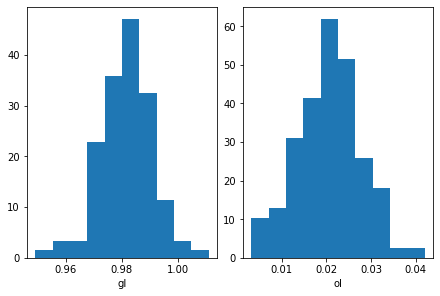

In [14]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
axes[0].hist(res_02As1['gl'], density=True)
axes[1].hist(res_02As1['ol'], density=True)
axes[0].set_xlabel('gl')
axes[1].set_xlabel('ol')
plt.show()

We pre-defined pure FeO and pure Na2O phases as the evaluation of Fe loss and Na loss, if you don't want to check this, simply delete these sheets
Below we give an example to calculate Fe loss (%) and Na loss (%) in the first experimental run `02As1`


In [15]:
nat_bulk = nat_dict['bulk'].set_index('Run_no')
nat_bulk.loc['02As1', 'FeO']

12.42

In [16]:
nat_bulk.loc['02As1', 'Na2O']

1.96

In [17]:
res_02As1['Fe_loss'] = res_02As1['pureFe'] / nat_bulk.loc['02As1', 'FeO'] * 100 * 100
res_02As1['Fe_loss'].agg(['mean', 'median', 'std'])

mean      0.00968
median    0.00000
std       0.08319
Name: Fe_loss, dtype: float64

In [18]:
res_02As1['Na2O_loss'] = res_02As1['pureNa'] / nat_bulk.loc['02As1', 'Na2O'] * 100 * 100
res_02As1['Na2O_loss'].agg(['mean', 'median', 'std'])

mean      3.560908
median    1.569360
std       4.117357
Name: Na2O_loss, dtype: float64